In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [16]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(autoload_with=engine)


In [17]:
# View all of the classes that automap found
base.classes.keys()

['station', 'measurement']

In [18]:
# Save references to each table
station = base.classes.station
measurement = base.classes.measurement

In [19]:
# Create our session (link) from Python to the DB
sesh = Session(engine)

# Exploratory Precipitation Analysis

In [28]:
# Find the most recent date in the data set.
most_recent_date = sesh.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

In [43]:
parsed_date = dt.datetime(2017,8,23)
parsed_date

datetime.datetime(2017, 8, 23, 0, 0)

In [44]:
last_12 = parsed_date - dt.timedelta(days=365)
last_12

datetime.datetime(2016, 8, 23, 0, 0)

[('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', None), ('2016-08-24', 1.22), ('2016-08-24', 2.15), ('2016-08-24', 1.45), ('2016-08-25', 0.08), ('2016-08-25', 0.08), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 0.21), ('2016-08-25', 0.06), ('2016-08-25', 0.11), ('2016-08-26', 0.0), ('2016-08-26', 0.03), ('2016-08-26', 0.02), ('2016-08-26', 0.04), ('2016-08-26', 0.0), ('2016-08-26', 0.01), ('2016-08-27', 0.0), ('2016-08-27', 0.18), ('2016-08-27', 0.02), ('2016-08-27', 0.0), ('2016-08-27', 0.12), ('2016-08-27', None), ('2016-08-28', 0.01), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.6), ('2016-08-28', 2.07), ('2016-08-29', 0.0), ('2016-08-29', 0.17), ('2016-08-29', 0.04), ('2016-08-29', None), ('2016-08-29', 0.0), ('2016-08-29', 0.35), ('2016-08-29', 0.9), ('2016-08-30', 0.0), ('2016-08-30', 0.0), ('2016-08-30', 0.02), ('2016-08-30', 0.0), ('2016-08-30', 0.0), ('2016-08-30', 0.05), ('2016-08-31', 0.13), (

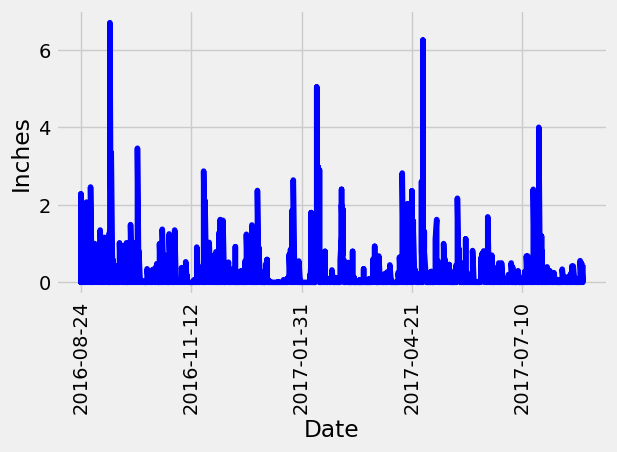

In [69]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
twelve_month_prcp = sesh.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= last_12).\
    order_by(measurement.date).all()
print(twelve_month_prcp)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
data = [{"Date": date, "Preciptation(Inches)": prcp} for date, prcp in twelve_month_prcp]
precip_df = pd.DataFrame(data)
precip_df['Preciptation(Inches)'] = precip_df['Preciptation(Inches)'].fillna(0)
# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(precip_df['Date'], precip_df['Preciptation(Inches)'], color='blue')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(6))
plt.tight_layout()

In [72]:
# Use Pandas to calculate the summary statistics for the precipitation data
summ_stats = precip_df['Preciptation(Inches)'].describe()
summ_stats

count    2223.000000
mean        0.159951
std         0.441220
min         0.000000
25%         0.000000
50%         0.010000
75%         0.110000
max         6.700000
Name: Preciptation(Inches), dtype: float64

# Exploratory Station Analysis

In [83]:
# Design a query to calculate the total number of stations in the dataset
num_stations = sesh.query(func.count(station.station)).all()
num_stations

[(9,)]

# Reflect Tables into SQLAlchemy ORM

In [92]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_count = sesh.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
station_id_counts = [(station, count) for station, count in station_count]
station_id_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [96]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_id = station_id_counts[0][0]
temperature_stats = sesh.query(func.min(measurement.tobs),
                               func.max(measurement.tobs),
                               func.avg(measurement.tobs)).\
                        filter(measurement.station == most_active_id).all()
print(temperature_stats)

[(54.0, 85.0, 71.66378066378067)]


[(77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), (66.0,), 

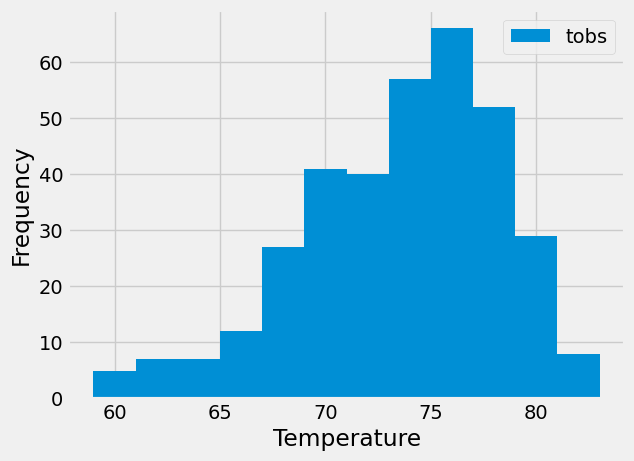

In [104]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
twelve_month_temp = sesh.query(measurement.tobs).\
    filter(measurement.date >= last_12).\
    filter(measurement.station == most_active_id).all()
print(twelve_month_temp)
most_active_temps = [temp[0] for temp in twelve_month_temp]
plt.hist(most_active_temps, bins=12, label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Close Session

In [105]:
# Close Session
sesh.close()